Presentado por: Juliana Andrea Amézquita Abello

Fecha: 14 de enero, 2022


## Parte 1: Análisis exploratorio de datos

In [1]:
# Librerías para tratamiento, limpieza y visualización de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
url = 'https://github.com/juli-amezquita/proyecto-cars/blob/main/Laboratorio_dataset_car.csv?raw=true'
data = pd.read_csv(url, sep=";")

# Revisamos el head de nuestro dataframe 
data.head()

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1750 non-null   object
 1   Maintenance  1750 non-null   object
 2   Doors        1750 non-null   object
 3   Person       1750 non-null   object
 4   lug_boot     1750 non-null   object
 5   safety       1750 non-null   object
 6   class        1750 non-null   object
dtypes: object(7)
memory usage: 95.8+ KB


* Tenemos 1750 observaciones y 7 variables. 
* No se tienen valores nulos.
* Todas las variables son categóricas
* La variable a predecir es class.

### Distribución variable objetivo

   class  total
0  unacc   1215
1    acc    390
2  vgood     70
3   good     75


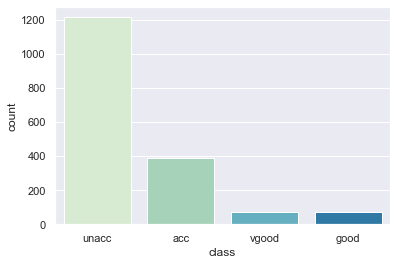

In [4]:
# Se verifica la distribución de la variable a predecir para saber si se tiene un conjunto de datos balanceado

ax = sns.countplot(x="class", data=data, palette = "GnBu")
print(pd.DataFrame(data.groupby(["class"], sort=False)["class"].count().reset_index(name="total")))

# Class
# vgood = very good
# good = good
# acc = accepted
# unacc = unaccepted

Como primera medida se hace una exploración de la variable objetivo: se observa que es una variable de tipo categórica y con 4 clases que se pueden interpretar de la siguiente manera: unacc (unaccepted), acc (accepted), good y vgood (very good). Por otro lado, se puede interpretar que: hay 1215 instancias que se clasificaron como “unaccepted”, 390 como “accepted”, 75 como “good” y 70 como “vgood”. Como primera conclusión del EDA se puede decir, que es evidente que tenemos un conjunto de datos desbalancado con 69% de las instancias dentro de la clase “unaccepted”, esto hay que tenerlo en cuenta al momento de crear los modelos ya que influirá en los resultado y en qué tan bien o mal clasifiquen los mismos.

### Distribución de variables

Revisamos cómo están distribuidas nuestras variables predictoras

Text(0.5, 0.98, 'Distribución Variables')

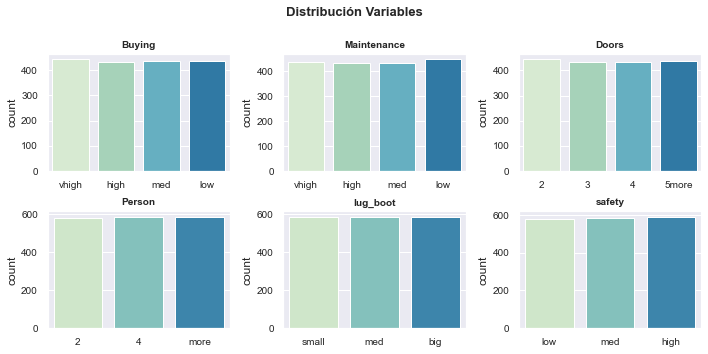

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,5))

ax = ax.flat

features = data.drop("class", axis=1) # De nuestro dataframe sacamos la variable objetivo para graficar solo las variables predictoras

for i, var in enumerate(features):
    sns.countplot(data = features, x= var, palette="GnBu", ax= ax[i])
        
    ax[i].set_title(var, fontsize = 10, fontweight = "bold")
    ax[i].tick_params(labelsize = 10)
    ax[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.85)
fig.suptitle('Distribución Variables', fontsize = 13, fontweight = "bold")

Se observa que todas las variables predictoras son categóricas y su distribución es uniforme entre clases:
* “Buying”: se interpreta como “la intención de compra”. Tiene 4 clases que van de bajo a muy alto. 
* “Maintenance”: se interpreta como “requerimientos de mantenimiento”. Tiene 4 clases que van de bajo a muy alto. 
* “Doors”: se interpreta como “el número de puertas”. Tiene 4 clases que van desde 2 puertas hasta más de 5. 
* “Person”: se interpreta como “la capacidad de pasajeros”. Tiene 3 clases: 2, 4 y más pasajeros. 
* “lug_boot”: se interpreta como “el tamaño de la bodega”. Tiene 3 clases que son “small”, “med” y “big”.
* “safety”: se interpreta como “el nivel de seguridad ofrecido”. Tiene 3 clases que son “low, “med” y “high”. 

### Relación variables predictoras con variable objetivo

Text(0.5, 0.98, 'Relación varibles vs variable objetivo')

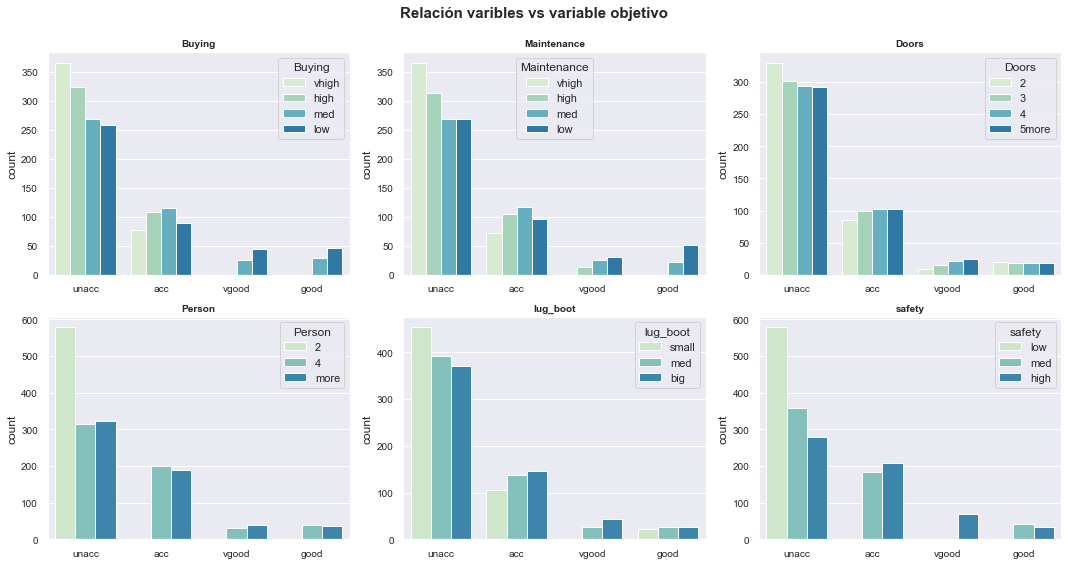

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

ax = ax.flat

features = data.drop("class", axis=1) # Tomamos solo las variables predictoras 
clase = data["class"].copy() # Variable objetivo

for i, var in enumerate(features):
    sns.countplot(x=clase, hue=var, data=features, palette="GnBu", ax= ax[i])
        
    ax[i].set_title(var, fontsize = 10, fontweight = "bold")
    ax[i].tick_params(labelsize = 10)
    ax[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Relación varibles vs variable objetivo', fontsize = 15, fontweight = "bold")

En la Figura se observa la relación de las variables predictoras respecto a la variable objetivo. Se nota que hay una clara consistencia entre el desbalanceo general de los datos mencionado anteriormente (69% unaccepted) y la distribución desbalanceada existente entre cada una de las variables predictoras y la variable objetivo. 

Una de las conclusiones que se pueden derivar de esta gráfica, es que definitivamente los vehículos de tamaño pequeño tienen mayor “unaccepted” que los vehículos de tamaño grande. Esto se induce observando las gráficas de “Person”, “Doors” y “lug_boot”. Por otro lado, se concluye que, en términos de seguridad, a pesar de que la mayoría de vehículos fueron “unaccepted”, un 37% de ellos fueron bien calificados con seguridad media y alta.

## Parte 2: Preprocesamiento

Dado que todas las variables son de tipo categórico se procede a crear una nueva variable de tipo numérico para cada una de ellas en la que se agrupa cada clase, en otras palabras, vamos a crear para cada variable lo que se conoce como una variable “dummy”. Se usa una codificación ascendente desde 1. Por ejemplo, la variable “safety” quedaría: “low”: 1, “med”: 2, “high”: 3. Para las variables con mezcla de números y texto se codifica dejando el número. Por ejemplo, la variable “Person” quedaría: “2”: 2, “4”: 4, “more”: 5. Finalmente, la variable “class” quedaría representada así: "unacc": 1, "acc": 2, "good": 3, "vgood": 4. Se muestra el resultado de las primeras 5 filas del dataset:

In [7]:
data['buyingDummy'] = data['Buying'].map({"low":1, "med":2, "high":3, "vhigh":4})
data['maintenanceDummy'] = data['Buying'].map({"low":1, "med":2, "high":3, "vhigh":4})
data['doorsDummy'] = data['Doors'].map({'2':2, '3':3, '4':4, '5more':5})
data['personDummy'] = data['Person'].map({'2':2, '4':4, 'more':5})
data['luggDummy'] = data['lug_boot'].map({"small":1, "med":2, "big":3})
data['safetyDummy']= data['safety'].map({"low": 1, "med":2, "high":3})
data['classDummy'] = data['class'].map({"unacc":1, "acc":2, "good":3, "vgood":4})

# Revisamos el nuevo dataframe 
data.head()

,Buying,Maintenance,Doors,Person,lug_boot,safety,class,buyingDummy,maintenanceDummy,doorsDummy,personDummy,luggDummy,safetyDummy,classDummy
0,vhigh,vhigh,2,2,small,low,unacc,4,4,2,2,1,1,1
1,vhigh,vhigh,2,2,small,med,unacc,4,4,2,2,1,2,1
2,vhigh,vhigh,2,2,small,high,unacc,4,4,2,2,1,3,1
3,vhigh,vhigh,2,2,med,low,unacc,4,4,2,2,2,1,1
4,vhigh,vhigh,2,2,med,med,unacc,4,4,2,2,2,2,1


In [8]:
# Se crea un dataframe que contiene solo las variables predictoras de tipo numérico al cual llamaremos "features" 
# y se crea otro con la variable objetivo el cual llamaremos "target"

features = data.drop(['Buying', 'Maintenance', 'Doors', 'Person', 'lug_boot', 'safety','class', 'classDummy'], axis =1).copy()
target = data['classDummy'].copy()

In [9]:
features.head()

,buyingDummy,maintenanceDummy,doorsDummy,personDummy,luggDummy,safetyDummy
0,4,4,2,2,1,1
1,4,4,2,2,1,2
2,4,4,2,2,1,3
3,4,4,2,2,2,1
4,4,4,2,2,2,2


In [10]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: classDummy, dtype: int64

## Parte 3: Modelos

In [11]:
# Importamos las librerías a utilizar
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

se dividen los datos en un grupo de entrenamiento y evaluación usando la función train_test_split de Scikit-learn: 80% para el conjunto de entrenamiento (“X_train” e “y_train”) y 20% para el de evaluación (“X_test” e “y_test”). Dado que tenemos un conjunto de datos desbalanceado hacemos uso del parámetro “stratify” que ayuda a que cuando se haga la división de los subconjuntos se haga con las mismas proporciones de etiquetas de clase que el conjunto de datos original.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, stratify=target)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1400, 6) (1400,) (350, 6) (350,)


### Modelo: Decision Tree Classifier

Se entrenarán 2 algoritmos de clasificación para predecir el nivel de aceptación de un vehículo en función de ciertas características como: puertas, seguridad, requerimientos de mantenimiento, etc. El primer modelo es el de “árboles de clasificación”, un algoritmo muy práctico por su facilidad de interpretación, pues su estructura es muy similar a la de un mapa con posibles resultados a partir de unas decisiones que irá tomando el algoritmo.

Las medidas de selección más populares son: el índice de Gini, la Ganancia de Información y la Proporción de Ganancia. Se utilizará la “Ganancia de Información” como medida de selección de atributos que se calcula a partir del concepto de entropía, que mide la pureza de un conjunto de datos. Al utilizar la Ganancia de Información se garantiza que antes de que el algoritmo haga la siguiente división, se hará un cálculo de la entropía del nodo padre respecto al promedio de la entropía del siguiente nodo (nodo hijo). Cuanto menor sea la entropía, es mejor porque hay una mayor ganancia de información. Se crea un modelo de árbol de decisión utilizando Scikit-learn, con los siguientes parámetros: 

* criterion=entropy --> Es La función para medir la calidad de cada división, se utiliza entropy porque nuestras variables son categorícas
* min_samples_split=20 --> Se refiere a la cantidad mínima de muestras que debe tener un nodo para poder subdividir, para correr el modelo por primera vez se toma 20.
* min_samples_leaf=5 --> Se refiere a la cantidad mínima de muestras que puede tener un nodo hoja, por ahora tratamos con 5. Si tuviera menos, no se formaría esa hoja y el algoritmo se regresa al nodo anterior.
* class_weight='balanced' --> Este parámetro nos va ayudar a ajustar automáticamente los pesos de las clases, ya que tenemos un dataset desequlibrado.

In [13]:
# Creación del modelo
modeloDTC = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=5, max_depth = 5,criterion= 'entropy', 
                                class_weight = 'balanced')


# Entrenamiento del modelo
modeloDTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=5, min_samples_leaf=5, min_samples_split=20)

Profundidad del árbol: 5
Número de nodos terminales: 17


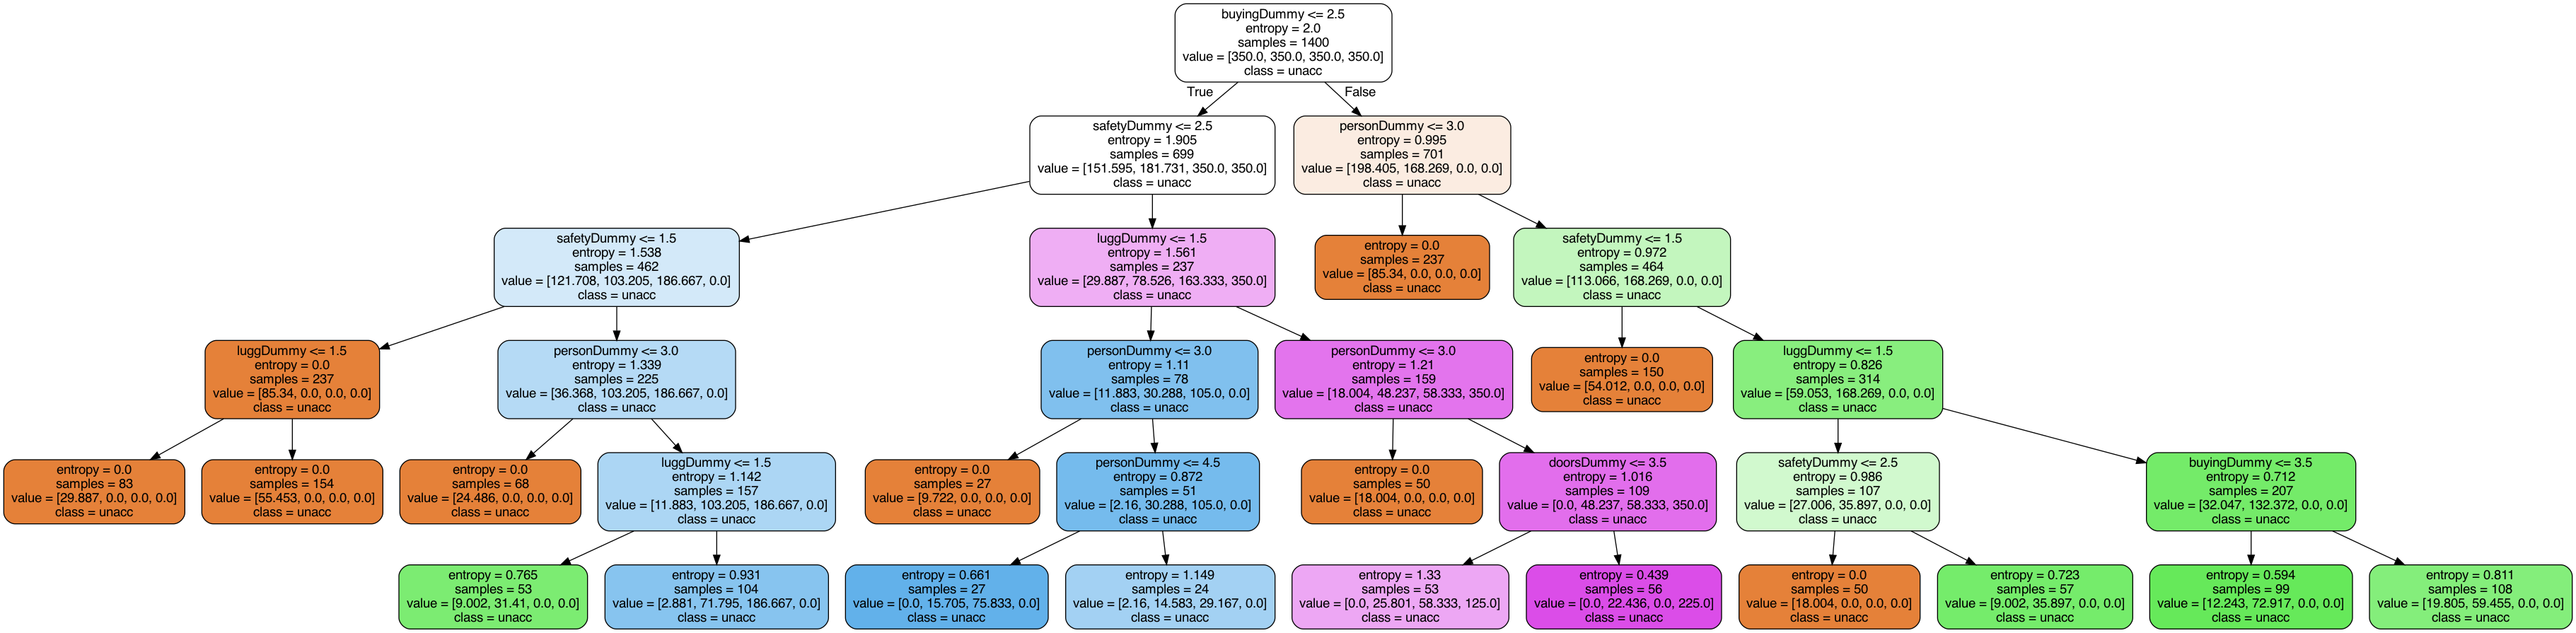

In [14]:
from six import StringIO
from IPython.display import Image 
import pydotplus

# Estructura del árbol

dot_data = StringIO()

print(f"Profundidad del árbol: {modeloDTC.get_depth()}")
print(f"Número de nodos terminales: {modeloDTC.get_n_leaves()}")


export_graphviz(decision_tree = modeloDTC,
                out_file=dot_data, 
                feature_names = list(features), 
                class_names = list(data['class']),
                filled = True,
                rounded = True,
                impurity = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [15]:
# Error de test del modelo
prediccionesDTC = modeloDTC.predict(X_test)

print("Matriz de confusión")
pd.DataFrame(confusion_matrix(y_test, prediccionesDTC),
             columns= ['unacc', 'acc', 'good', 'vgood'],
             index = ['unacc', 'acc', 'good', 'vgood'])

Matriz de confusión


,unacc,acc,good,vgood
unacc,208,32,3,0
acc,0,43,24,11
good,0,0,14,1
vgood,0,0,0,14


In [39]:
from sklearn.metrics import f1_score, balanced_accuracy_score

# balancedAccuracy es una métrica en problemas de clasificación binaria y multiclase para tratar con conjuntos de datos desequilibrados. 
# Se define como el promedio de recall obtenido en cada clase.
balancedAccuracy = balanced_accuracy_score(y_test, prediccionesDTC)
print(f"El puntaje de balanced accuracy es: {100 * balancedAccuracy} %")

metricaf1 = f1_score(y_test, prediccionesDTC, average='macro')
print(f"El puntaje de F1 es: {100 * metricaf1}%")

El puntaje de balanced accuracy es: 83.51456157011712 %
El puntaje de F1 es: 67.11215454400534%


In [17]:
print(classification_report(y_test, prediccionesDTC))

              precision    recall  f1-score   support

           1       1.00      0.86      0.92       243
           2       0.57      0.55      0.56        78
           3       0.34      0.93      0.50        15
           4       0.54      1.00      0.70        14

    accuracy                           0.80       350
   macro avg       0.61      0.84      0.67       350
weighted avg       0.86      0.80      0.82       350



### Resultados 

Al correr el modelo obtenemos los siguientes resultados:

profundidad del árbol 5, número de nodos terminales 17 y puntaje F1 = 67.11%. 

El resultado de accuracy es 80%, el cual puede resultar engañoso pues tenemos un conjunto de datos desbalanceado que favorece a la clase mayoritaria, por ello se utilizó la puntuación F1 como medida de evaluación del modelo (es el promedio ponderado de “precisión” y “recall”), ya que considera falsos positivos y negativos. “Precision” es el porcentaje de instancias positivas respecto al total predichas como positivas. 

Por ejemplo en reporte de clasificación, para “precision” el modelo predice correctamente el 100% de las observaciones de la clase 1 (unacc). Esto se calcula teniendo en cuenta la matriz de confusión de la siguiente manera: 208/(208+0+0+0). Predice bien el 57% de las observaciones pertenencientes a la clase 2 (acc) que se calcula así: 43/(32+43+0+0). Predice bien un 34% las observaciones de la clase 3 y con un 54% las observaciones de la clase 4. Por otro lado “Recall”, también conocida como la Tasa de Verdaderos positivos (TP Rate) es la proporción de instancias positivas correctamente clasificadas. Por ejemplo el calculo del TP Rate basándonos en nuestra matriz de confusión para la clase unacc es 208/(208+32+3+0)igual a aprox 86%. 

Nuestro árbol obtuvo en la evaluación del puntaje F1 el 67% y dado que la puntuación F1 es la representación real del rendimiento del modelo, se intentará mejorar este resultado utilizando GridSearchCV con validación cruzada repetida para optimizar algunos hiperparámetro.

#### Optimización de hiperparámetros para el modelo de árboles

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# Hiperparámetros a optimizar 
param_grid = {'max_depth': [None, 5,10,20],
              'ccp_alpha':[0,5,10,20],  # Parámetro de complejidad utilizado para la poda
              'min_samples_split':[10,15,20], # El número mínimo de muestras requeridas para dividir un nodo interno 
              'min_samples_leaf':[10,15,20],  # El número mínimo de muestras requeridas para estar en un nodo hoja             
                   
}

# GridSearchCV por validación cruzada repetida 

grid_tree = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = 'balanced', criterion='entropy'),
                         param_grid = param_grid,
                         n_jobs= -1,
                         cv= RepeatedStratifiedKFold(n_splits=3, n_repeats=3),
                         refit= True,
                         verbose= 3,
                         return_train_score = True)

grid_tree.fit(X_train, y_train)

Fitting 9 folds for each of 144 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:   12.6s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=3, random_state=None),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy'),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0, 5, 10, 20],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 15, 20]},
             return_train_score=True, verbose=3)

In [19]:
# Mejores parámetros encontrados

grid_tree.best_params_

{'ccp_alpha': 0,
 'max_depth': None,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [20]:
# Estructura del árbol final
DTCoptimizado = grid_tree.best_estimator_
print(f"Profundidad del árbol: {DTCoptimizado.get_depth()}")
print(f"Número de nodos terminales: {DTCoptimizado.get_n_leaves()}")

Profundidad del árbol: 9
Número de nodos terminales: 50


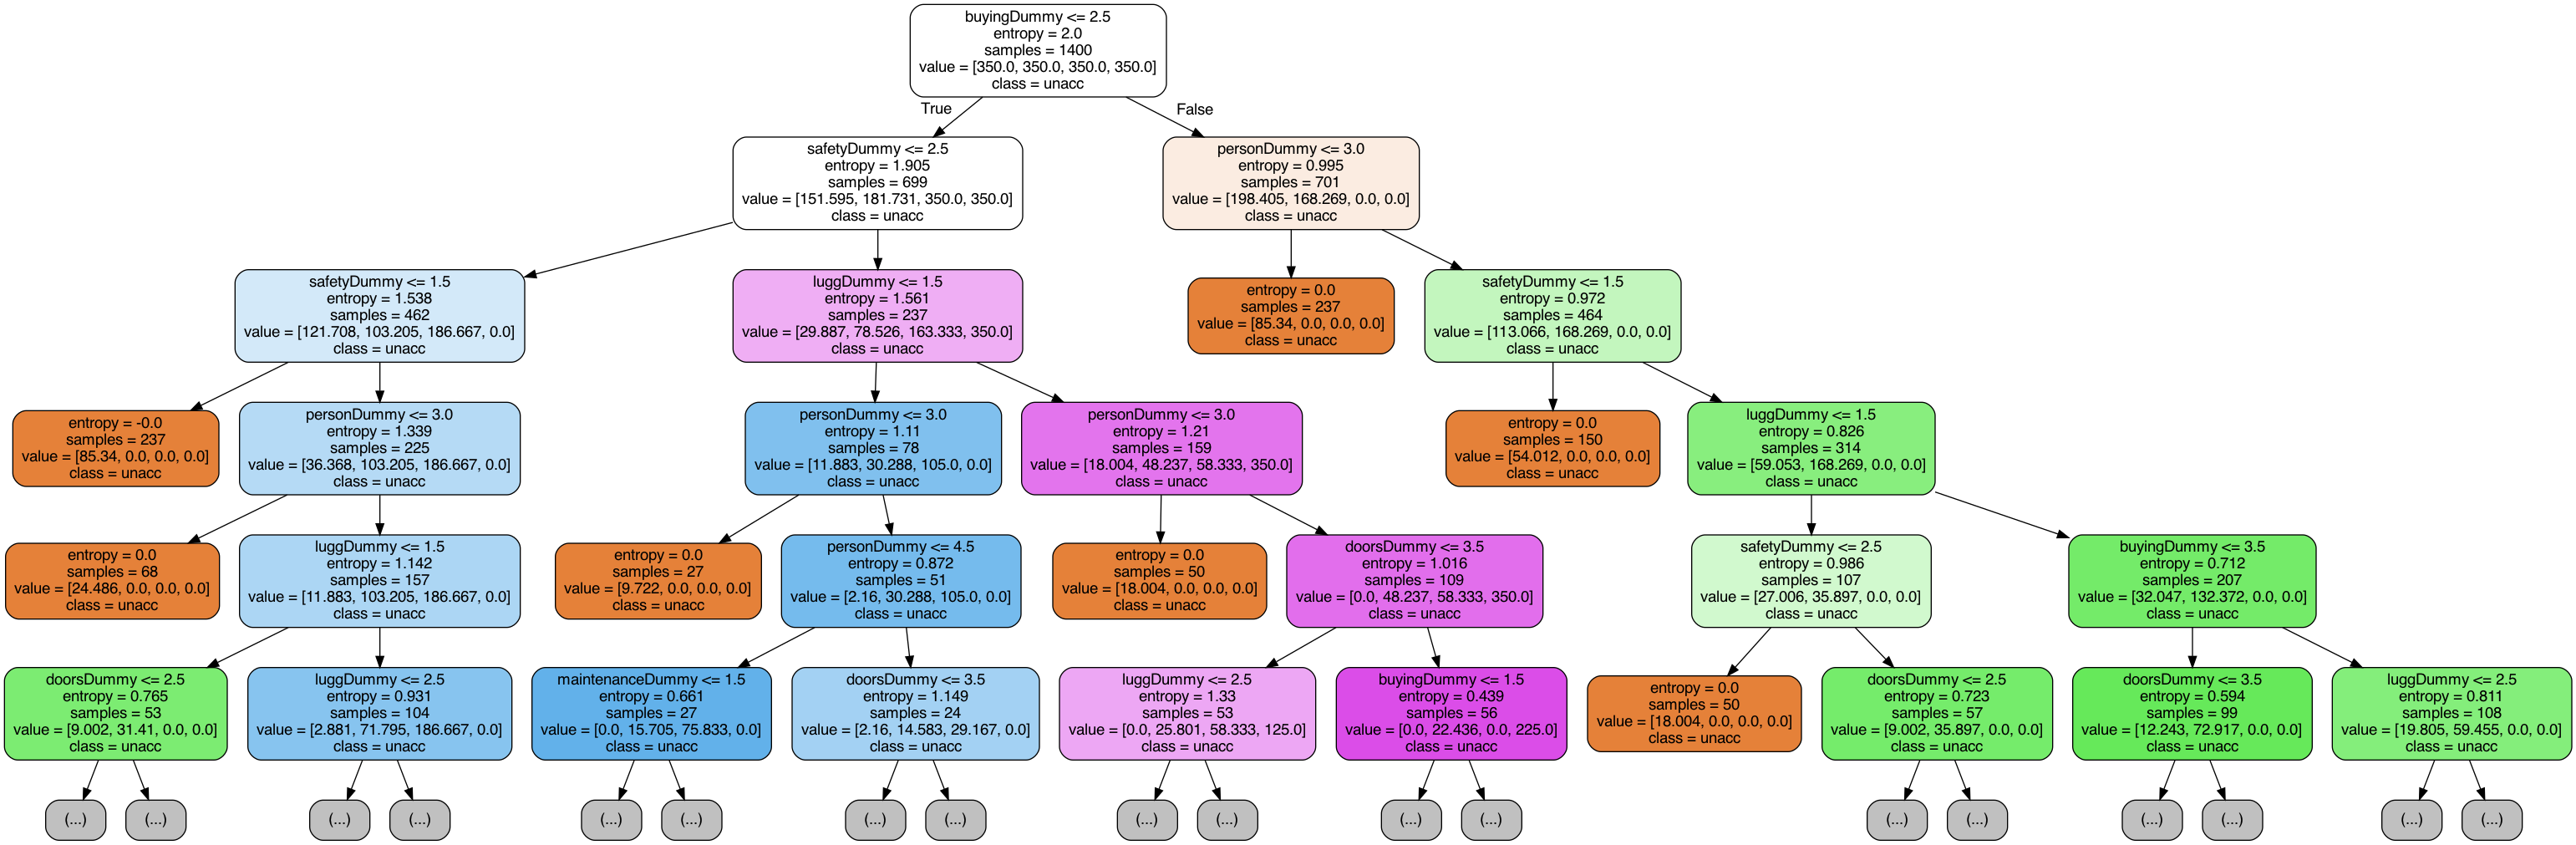

In [21]:
dot_data = StringIO()

export_graphviz(decision_tree = DTCoptimizado,
                out_file=dot_data,
                max_depth=5,
                feature_names = list(features), 
                class_names = list(data['class']),
                filled = True,
                rounded = True,
                impurity = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [22]:
# Error de test del modelo final
predicciones = DTCoptimizado.predict(X_test)

metricaf1 = f1_score(y_test, predicciones, average='macro')
print(f"El puntaje de F1 es: {100 * metricaf1} %")

balancedAccuracy = balanced_accuracy_score(y_test, predicciones)
print(f"El puntaje de balanced accuracy es: {100 * balancedAccuracy} %")

El puntaje de F1 es: 69.37760339933308 %
El puntaje de balanced accuracy es: 83.92608420386199 %


In [23]:
print("Matriz de confusión")
pd.DataFrame(confusion_matrix(y_test, predicciones),
             columns= ['unacc', 'acc', 'good', 'vgood'],
             index = ['unacc', 'acc', 'good', 'vgood'])

Matriz de confusión


,unacc,acc,good,vgood
unacc,212,29,2,0
acc,2,43,25,8
good,0,1,14,0
vgood,0,0,0,14


In [24]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           1       0.99      0.87      0.93       243
           2       0.59      0.55      0.57        78
           3       0.34      0.93      0.50        15
           4       0.64      1.00      0.78        14

    accuracy                           0.81       350
   macro avg       0.64      0.84      0.69       350
weighted avg       0.86      0.81      0.82       350



### Resultados

Con estos hiperparámetros se obtitne una profundidad del árbol: 9, un número de nodos terminales: 50 y un puntaje F1 de 69%. A pesar de que se optimizaron los hiperparámentros, el modelo solo mejora 2 puntos porcentuales versus el modelo de árboles corrido inicialmente.

### Importancia de predictores modelo de árboles

In [25]:
importancia_predictores = pd.DataFrame(
                            {'Variable Predictora': list(features),
                             'Importancia': DTCoptimizado.feature_importances_}
                            )
importancia_predictores.sort_values('Importancia', ascending=False)

,Variable Predictora,Importancia
5,safetyDummy,0.328643
0,buyingDummy,0.231009
4,luggDummy,0.198688
3,personDummy,0.167529
2,doorsDummy,0.070181
1,maintenanceDummy,0.003951


### Modelo Random Forest Classifier

Finalmente, se entrena un modelode Random Forest para comparar sus resultados. Este modelo utiliza métodos de bagging, lo que quiere decir que ajustan múltiples modelos, cada uno con un subconjunto distinto de datos de entrenamiento. Esto es bueno porque el modelo logra encontrar un equilibrio entre sesgo y varianza.

Se instancia el modelo con sus parámetros por defecto y utilizando entropía y el parámetro class_weight “balanced” para ver sus resultados. Luego se aplicará un GridSearchCV con validación repetida para encontrar los mejores hiperparámetros.

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
rfc = RandomForestClassifier(criterion = 'entropy', class_weight= 'balanced')

# Entrenamiento del modelo
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy')

In [27]:
# Error de test del modelo
predicciones_rfc = rfc.predict(X = X_test)

print("Matriz de confusión")
pd.DataFrame(confusion_matrix(y_test, predicciones_rfc),
             columns= ['unacc', 'acc', 'good', 'vgood'],
             index = ['unacc', 'acc', 'good', 'vgood'])

Matriz de confusión


,unacc,acc,good,vgood
unacc,218,25,0,0
acc,8,39,25,6
good,0,10,5,0
vgood,0,1,0,13


In [28]:
balancedAccuracy = balanced_accuracy_score(y_test, predicciones_rfc)
print(f"El puntaje de balanced accuracy es: {100 * balancedAccuracy} %")

metricaf1 = f1_score(y_test, predicciones_rfc, average='macro')
print(f"El puntaje de F1 es: {100 * metricaf1} %")

El puntaje de balanced accuracy es: 66.4756025867137 %
El puntaje de F1 es: 61.238561458052246 %


In [29]:
print(classification_report(y_test, predicciones_rfc))

              precision    recall  f1-score   support

           1       0.96      0.90      0.93       243
           2       0.52      0.50      0.51        78
           3       0.17      0.33      0.22        15
           4       0.68      0.93      0.79        14

    accuracy                           0.79       350
   macro avg       0.58      0.66      0.61       350
weighted avg       0.82      0.79      0.80       350



### Optimización de hiperparámetros

Se entrena utilizando GridSearchCV con validación repetida para encontrar los mejores hiperparámetros.

In [30]:
# Hiperparámetros a optimizar 
param_grid = {'max_depth': [None, 5,10,20], # La profundidad máxima que puede alcanzar los árboles. 
              'ccp_alpha':[0,5,10,20],  # Parámetro de complejidad utilizado para la poda
              'max_features': ['auto',2,3], # La cantidad de predictores que se deben considerar al buscar la mejor división, 'auto'(utiliza todos los predictores)
              'min_samples_split':[2,10,15,20], # El número mínimo de muestras requeridas para dividir un nodo interno 
              'min_samples_leaf':[1,10,15,20],  # El número mínimo de muestras requeridas para estar en un nodo hoja             
                   
}

# GridSearchCV por validación cruzada repetida 

grid_rfc = GridSearchCV(estimator = RandomForestClassifier(criterion = 'entropy', class_weight= 'balanced'),
                         param_grid = param_grid,
                         n_jobs= -1,
                         cv= RepeatedStratifiedKFold(n_splits=3, n_repeats=2),
                         refit= True,
                         verbose= 3,
                         return_train_score = True)

grid_rfc.fit(X_train, y_train)

Fitting 6 folds for each of 768 candidates, totalling 4608 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 4608 out of 4608 | elapsed:  9.4min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy'),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0, 5, 10, 20],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 2, 3],
                         'min_samples_leaf': [1, 10, 15, 20],
                         'min_samples_split': [2, 10, 15, 20]},
             return_train_score=True, verbose=3)

In [31]:
# Mejores parámetros encontrados

grid_rfc.best_params_

{'ccp_alpha': 0,
 'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [32]:
rfcOptimizado = grid_rfc.best_estimator_
predicciones = rfcOptimizado.predict(X = X_test)

metricaf1 = f1_score(y_test, predicciones, average='macro')
print(f"El puntaje de F1 es: {100 * metricaf1} %")

balancedAccuracy = balanced_accuracy_score(y_test, predicciones)
print(f"El puntaje de balanced accuracy es: {100 * balancedAccuracy} %")

El puntaje de F1 es: 68.61219164411338 %
El puntaje de balanced accuracy es: 79.77287116176005 %


In [33]:
print("Matriz de confusión")
pd.DataFrame(confusion_matrix(y_test, predicciones),
             columns= ['unacc', 'acc', 'good', 'vgood'],
             index = ['unacc', 'acc', 'good', 'vgood'])

Matriz de confusión


,unacc,acc,good,vgood
unacc,214,27,2,0
acc,0,45,27,6
good,0,4,11,0
vgood,0,0,0,14


In [34]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           1       1.00      0.88      0.94       243
           2       0.59      0.58      0.58        78
           3       0.28      0.73      0.40        15
           4       0.70      1.00      0.82        14

    accuracy                           0.81       350
   macro avg       0.64      0.80      0.69       350
weighted avg       0.87      0.81      0.83       350



### Resultados 

Corriendo el modelo con sus mejores hiperparámetros se obtuvo un puntaje de F1=68.61%

### Importancia de predictores modelo random forest

In [35]:
importancia_predictores = pd.DataFrame(
                            {'Variable Predictora': list(features),
                             'Importancia': rfcOptimizado.feature_importances_}
                            )
importancia_predictores.sort_values('Importancia', ascending=False)

,Variable Predictora,Importancia
5,safetyDummy,0.325438
4,luggDummy,0.185952
3,personDummy,0.179791
0,buyingDummy,0.131875
1,maintenanceDummy,0.105929
2,doorsDummy,0.071016


## Conclusiones

El entrenamiento de modelos de clasificación en bases de datos desbalanceadas es algo muy común en la vida real. En este trabajo se pudo apreciar la importancia de aplicar ciertas técnicas para que este desbalanceo no afecte la capacidad predictiva de los modelos. En este caso sólo se utilizó el ajuste del hiperpárametro class_weight='balanced' en el entrenamiento del modelo ofrecido por scikit-learn pero existen otras técnicas. Por otro lado, es clave escoger una buena métrica de evaluación para este tipo de problemas, pues como se vió el accuracy no es una buena medida de evaluación y puede resultar engañosa, por lo cual se pueden utilizar otras medidas de evaluación altenativas como el Puntaje F1, Precision y Recall. 

Después de optimizar los hiperpárametros de ambos modelos no se obtuvo mucha diferencia en sus resultados en lo que se refiere al puntaje de F1, que para el caso del modelo de áboles fue de 69% y para el modelo de Random Forest fue de 68%. Para mejorar los resultados de los modelos se pueden aplicar otras técnicas para balancear las clases de la variable objetivo, ya sea recogiendo más datos para representar mejor las otras clases o se puede plantear un problema binario haciendo una redistribución de los datos que ya se tienen en el que sólo exista la clase 'aceptado' y 'no aceptado'.